<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Ordinary_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Ordinary Differential Equations
===============================================

### Suggestion

Run the code cell below before the others to make sure that scipy is up to date and the figures render well.

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20
!pip3 install --upgrade scipy

**The Damped Harmonic Oscillator**

### The Problem

Use the $rk23$ (Second order Runge-Kutta) method and plot a solution $x(t)$ for the damped harmonic oscillator, described by the differential equations

\begin{equation}
\frac{d^2x}{dt^2} + \gamma\frac{dx}{dt} + x = 0.
\end{equation}

Also, obtain phase space plots for some values of $\gamma$.

We can recast the equation above in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$, yielding

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &= -y_0 - \gamma y_1
\end{align*}

The code cell below has code that uses 'solve_ivp' routine in the 'scipy.integrate' module to solve the dynamics from $y_0=1, y_1=0$ at $t=0$. The next code cell plots the phase space, $y_1$ vs $y_0$, for a numpy grid of initial conditions.

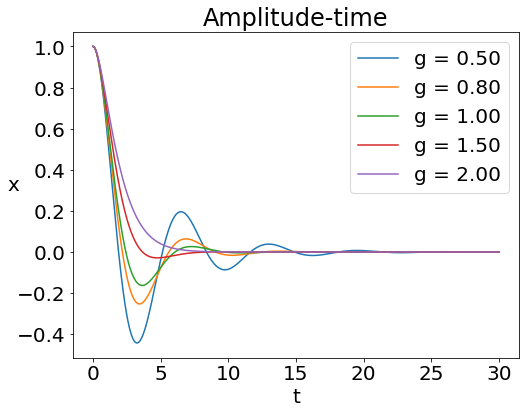

In [14]:
import numpy as np
from scipy.integrate import solve_ivp


def func(t, y, g):
    y0, y1 = y
    dy0dt = y1 
    dy1dt = -y0 - g * y1
    return np.array([dy0dt, dy1dt])


y_init = [1.0, 0.0]
t_final = 30
times = np.linspace(0.0, t_final, 1000)

plt.title("Amplitude-time")
plt.xlabel('t')
plt.ylabel('x', rotation=0)
gammas = [0.5, 0.8, 1.0, 1.5, 2.0]
for g in gammas:
    soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='RK23',\
                     args=(g,))
    plt.plot(times, soln.y[0], label='g = %1.2lf' % (g,))
    
plt.legend()   

plt.show()

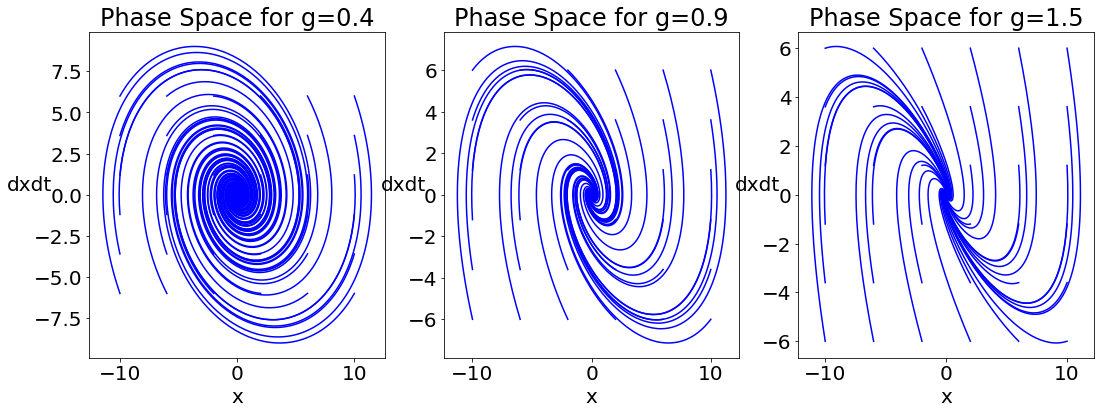

CPU times: user 1.82 s, sys: 25.8 ms, total: 1.84 s
Wall time: 1.85 s


In [15]:
%%time
import matplotlib.pyplot as plt
gammas = [0.4, 0.9, 1.5]
t_final = 30
times = np.linspace(0.0, t_final, 1000)

# Grid of initial conditions, recast as an iterable object 'ics'
y0m, y0mx = -10, 10
y1m, y1mx = -6, 6
Y0, Y1 = np.mgrid[y0m:y0mx:6j, y1m:y1mx:6j]
ics = np.vstack([Y0.ravel(), Y1.ravel()]).T

def func(t, y, g):
    y0, y1 = y
    dy0dt = y1 
    dy1dt = -y0 - g * y1
    return np.array([dy0dt, dy1dt])


plt.rcParams['figure.figsize'] = (len(gammas)*6,6)
for i,g in enumerate(gammas):
    plt.subplot(1,len(gammas),i+1)
    plt.title("Phase Space for g=%1.1lf" % (g,))
    plt.xlabel('x')
    plt.ylabel('dxdt', rotation=0)
    for p in ics:
        soln = solve_ivp(func, (0, t_final), p, t_eval=times, method='RK23',\
                         args=(g,))
        plt.plot(soln.y[0], soln.y[1], "b-")

plt.show()

**The Driven Oscillator with Damping**

### The Problem

Consider the previous problem, but add a forced external oscillation:

\begin{equation}
\frac{d^2x}{dt^2} + \gamma\frac{dx}{dt} + x = x_0\sin{\omega t}.
\end{equation}

We can recast the equation above in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$, yielding

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &= -y_0 - \gamma y_1 + x_0\sin{\omega t}
\end{align*}

Use the general $rk45$ integrator to obtain plots of the amplitude as a function of time for different driving frequencies $\omega$. Plot the root mean-squared amplitude (taken over very long times) as a function of $\omega$ and show that there is a resonance. Compare the runtimes of a trial with the older $rk23$ method and the stiffness-detecting implicit $LSODA$ method, keeping the same error bounds for both. Finally, you can experiment with the driving term by replacing the sine wave with a square wave and see what happens.

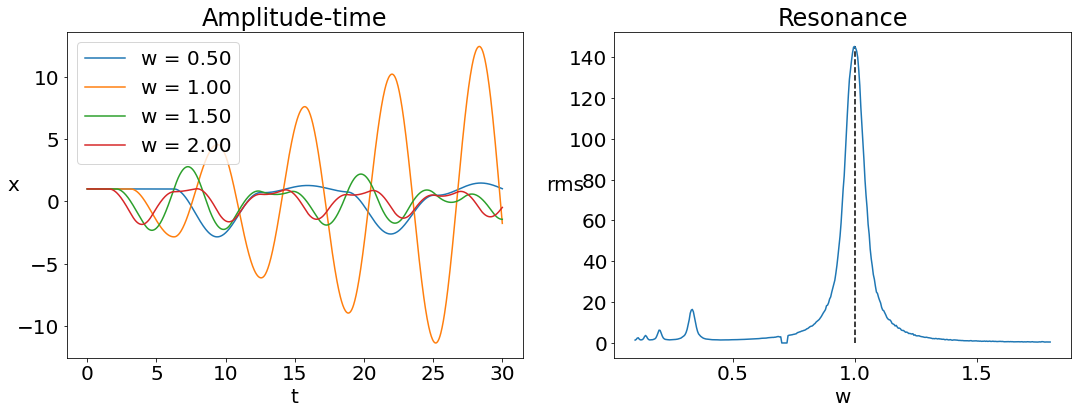

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import square

x0 = 1
g = 0.05
y_init = [1.0, 0.0]


def func(t, y, g, x0, w):
    y0, y1 = y
    dy0dt = y1 
    # dy1dt = -y0 - g * y1 + x0 * np.sin(w * t)
    dy1dt = -y0 - g * y1 + x0 * square(w * t)
    return np.array([dy0dt, dy1dt])


plt.subplot(1,2,1)
plt.title("Amplitude-time")
plt.xlabel('t')
plt.ylabel('x', rotation=0)
omegas = [0.5, 1.0, 1.5, 2.0]
t_final = 30
times = np.linspace(0.0, t_final, 1000)

for w in omegas:
    soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='RK45',\
                     args=(g,x0, w))
    plt.plot(times, soln.y[0], label='w = %1.2lf' % (w,))

plt.legend()

plt.subplot(1,2,2)
plt.title("Resonance")
plt.xlabel('w')
plt.ylabel('rms', rotation=0)

omegas = np.linspace(0.1, 1.8, 400)
rms = np.zeros_like(omegas)

t_final = 100
times = np.linspace(0.0, t_final, 4000)
for i,w in enumerate(omegas):
    soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='RK45',\
                     args=(g,x0, w))
    rms[i] = np.average(np.abs(soln.y[0])**2) - np.average(soln.y[0])**2

plt.vlines(1.0, 0.0, np.amax(rms),colors='black', linestyles='dashed')
plt.plot(omegas, rms)
plt.show()

In [7]:
x0 = 1
g = 0.05
y_init = [1.0, 0.0]
w = 0.6
t_final = 50
times = np.linspace(0, t_final, 1000)

print("Runtimes for rk23:")
%timeit soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='RK23',\
                         args=(g,x0, w), rtol=1e-5, atol=1e-8)
print("\nRuntimes for rk45:")
%timeit soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='RK45',\
                         args=(g,x0, w), rtol=1e-5, atol=1e-8)
print("\nRuntimes for lsoda:")
%timeit soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, method='LSODA',\
                         args=(g,x0, w), rtol=1e-5, atol=1e-8)

Runtimes for rk23:
1 loop, best of 5: 223 ms per loop

Runtimes for rk45:
10 loops, best of 5: 120 ms per loop

Runtimes for lsoda:
10 loops, best of 5: 54.7 ms per loop


### The Problem of Stiffness

An ordinary differential equation problem is stiff if the solution being sought is varying slowly, but there are nearby solutions that vary rapidly, so the numerical method must take small steps to obtain satisfactory results.

Stiffness is an efficiency issue. If we weren't concerned with how much time a computation takes, we wouldn't be concerned about stiffness. Nonstiff methods can solve stiff problems; they just take a long time to do it.

A model of flame propagation provides an example. When you light a match, the ball of flame grows rapidly until it reaches a critical size. Then it remains at that size because the amount of oxygen being consumed by the combustion in the interior of the ball balances the amount available through the surface. The simple model is

\begin{equation*}
\frac{dy}{dt} = y^2-y^3,
\end{equation*}

with initial condition $y(0)=\delta$, evolving for times $0<t<2/\delta$.

The scalar variable  $y(t)$ represents the radius of the ball. The  $y^2$ and  $y^3$  terms come from the surface area and the volume. The critical parameter is the initial radius, $\delta$ , which is "small." We seek the solution over a length of time that is inversely proportional to $\delta$.

We will start with the $RK45$ routine. If $\delta$ is not very small, the problem is not very stiff. Let us set  $\delta=0.01$  and request a relative error of $10^{-4}$ and see what we get.

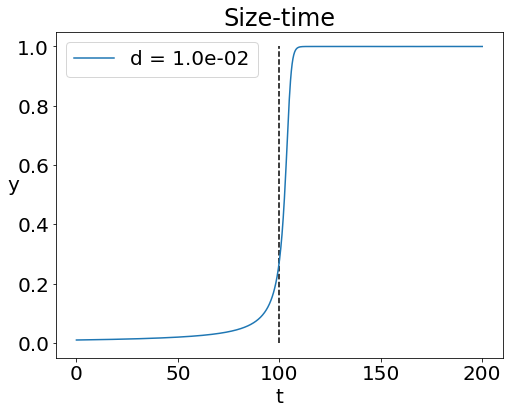

In [33]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)

def radius(initsize, **kwargs):
    t_final = 2.0/initsize
    times = np.linspace(0.0, t_final, 1000)
    return solve_ivp(lambda t,y: y**2 * (1-y), (0, t_final), [initsize],\
                     t_eval=times, **kwargs)
    
d = 0.01
data = radius(d, method='RK45', rtol=1e-4)
plt.title("Size-time")
plt.xlabel('t')
plt.ylabel('y', rotation=0)
plt.plot(data.t, data.y[0], label='d = %1.1e' % (d,))
plt.vlines(1/d, 0.0, np.amax(data.y[0]),colors='black', linestyles='dashed')
plt.legend()   
plt.show()

Now let's see stiffness in action. Decrease $\delta$ by a couple of orders of magnitude and measure the execution time. Compare the execution times of $RK45$ with the stiffness-detecting $LSODA$ method for both the stiff and non-stiff cases.

#### Suggestion

To expedite the execution of the $LSODA$ algorithm, add a routine for computing the Jacobian of the RHS. In this particular case, the Jacobian is simply

\begin{equation*}
J = \frac{d}{dy}\left(y^2-y^3\right)=2y-3y^2
\end{equation*}

In [11]:
print("Non-Stiff Case -")
d2 = 1e-1
print("RK45:")
%timeit radius(d2, method='RK45', rtol=1e-4)
print("LSODA:")
%timeit radius(d2, method='LSODA', rtol=1e-4)
print("\nStiff Case -")
d2 = 1e-4
print("RK45:")
%timeit radius(d2, method='RK45', rtol=1e-4)
print("LSODA sans Jacobian:")
%timeit radius(d2, method="LSODA", rtol=1e-4)
print("LSODA:")
%timeit radius(d2, method='LSODA', rtol=1e-4, jac=lambda t,y: y*(2-3*y))

Non-Stiff Case -
RK45:
100 loops, best of 5: 3.08 ms per loop
LSODA:
100 loops, best of 5: 3.09 ms per loop

Stiff Case -
RK45:
1 loop, best of 5: 404 ms per loop
LSODA sans Jacobian:
100 loops, best of 5: 5.98 ms per loop
LSODA:
100 loops, best of 5: 5.73 ms per loop


**Simulation of Non-Linear Dynamics Problems:**

### The Problem: The Van der Pol Oscillator
Van der Pol’s differential equation is

\begin{equation}
\frac{d^2x}{dt^2} - \mu\left(1-x^2\right)\frac{dx}{dt} + x = 0.
\end{equation}

The equation describes a system with nonlinear damping, the degree of nonlinearity given by $\mu$. If $\mu=0$, the system is linear and undamped, but as $\mu$ increases, so does the strength of the nonlinearity. 

Plot the phase portrait for the solution to Van der Pol’s equation in Python using SciPy’s ODE solver 'ivp_solve'.
We can recast the equation above in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$, yielding

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &=  \mu\left(1-x^2\right) y_1 - y_0
\end{align*}

If $\mu=0$, we have a simple harmonic oscillator and the phase portrait is simply a circle. For larger values of $\mu$, the solutions enter limit cycles, but the cycles are more complicated than just circles. These lcycles are periodic attractors: every non-trivial solution converges to the limit cycle.

The code cell below yields the phase space plot.

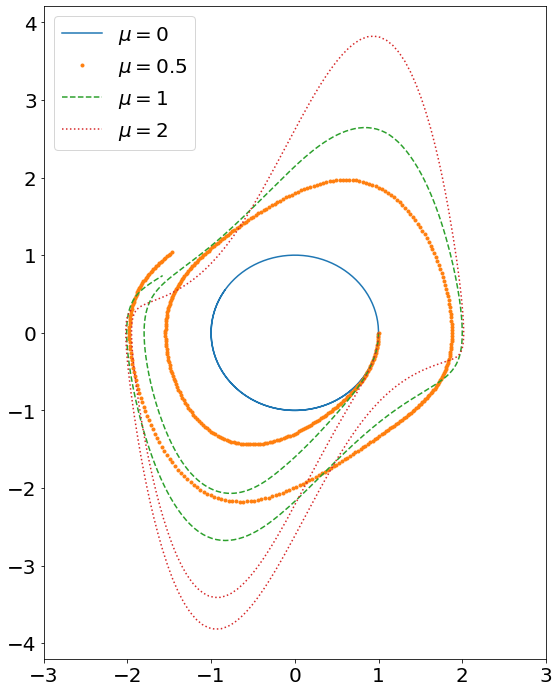

In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,12)

def vdp(t, z):
    x, y = z
    return [y, mu*(1 - x**2)*y - x]

a, b = 0, 10

mus = [0, 0.5, 1, 2]
styles = ["-", ".", "--", ":"]
t = np.linspace(a, b, 500)

for mu, style in zip(mus, styles):
    sol = solve_ivp(vdp, [a, b], [1, 0], t_eval=t)
    plt.plot(sol.y[0], sol.y[1], style)
  
# make a little extra horizontal room for legend
plt.xlim([-3,3])    
plt.legend([f"$\mu={m}$" for m in mus])
plt.show()

### The Problem: Limit Cycles in the Van der Pol Oscillator

A couple questions come to mind. First, how quickly do the solutions become periodic? Second, how does the period depend on $\mu$? To address these questions, we’ll use an optional argument to ivp_solve we have not used before.

For 'ivp_solve', an *event* is a function of the time $t$ and the solution $y$ whose roots the solver will report. To determine the period, we’ll look at where the solution is zero; our event function is trivial since we want to find the roots of the solution itself.

Since we have cast our second order ODE as a pair of first order ODEs, our solution is a vector, the function $x$ and its derivative. So to find roots of the solution, we look at what the solver sees as the first component of the solver. So, our 'event' function can simply be:

In [26]:
def root(t, y): return y[0]

Let’s set $\mu = 2$ and find the zeros of the solution over the interval $[0, 40]$, starting from the initial condition $x(0) = 1, \dot{x}(0) = 0$.

In [30]:
mu = 2
sol = solve_ivp(vdp, [0, 40], [1, 0], events=root)
zeros = sol.t_events[0]
print(zeros)

[ 1.25641089  4.92729983  8.73197045 12.54262781 16.34963671 20.16150487
 23.9686645  27.77450896 31.58696903 35.39804623 39.20477136]


To estimate the period of the limit cycle we look at the spacing between zeros, and how that spacing is changing. Finally, if we plot the deltas we see that the zero spacings quickly approach a constant value. Zero crossings are half periods, so the period of the limit cycle is twice the limiting spacing between zeros.

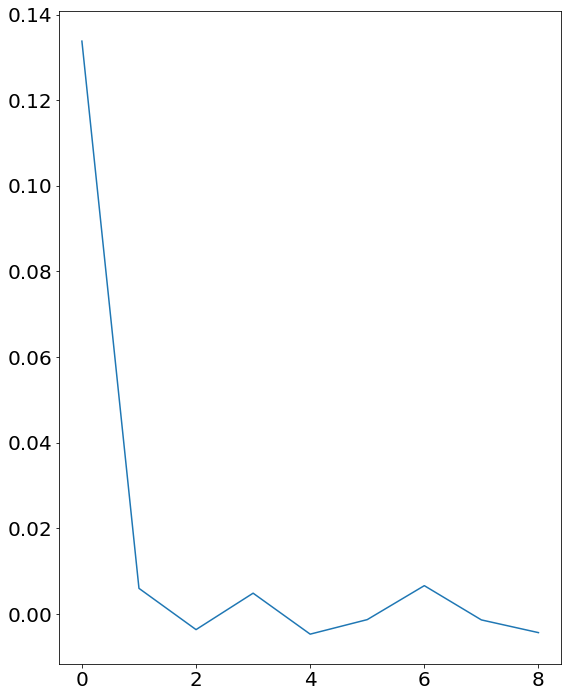

In [31]:
import matplotlib.pyplot as plt

spacing = zeros[1:] - zeros[:-1]
deltas = spacing[1:] - spacing[:-1]
plt.plot(deltas)
plt.show()

### Homework

As homework, the student is encouraged to determine the following numerically:

* Formulate and execute a Python program for estimating the period of the limit cycle of a Van der Pol oscillator for a given value of $\mu$.

* Run this program for small $\mu$ and large $\mu\sim 100$. The method described above should fail for large $\mu$. Plot $x$ vs $t$ for large $\mu$ and explain why it fails.

### The Problem: The Driven Van der Pol Oscillator 

### The Problem: The Lorenz Attractor

### The Problem: The Henon-Heiles System